1)Downloaded the dataset

 2)Load the dataset into the tool

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('penguins_size.csv')

# Check the first few rows of the dataset
print(df.head())


  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


3)Visualizations (Univariate, Bivariate, and Multi-Variate):

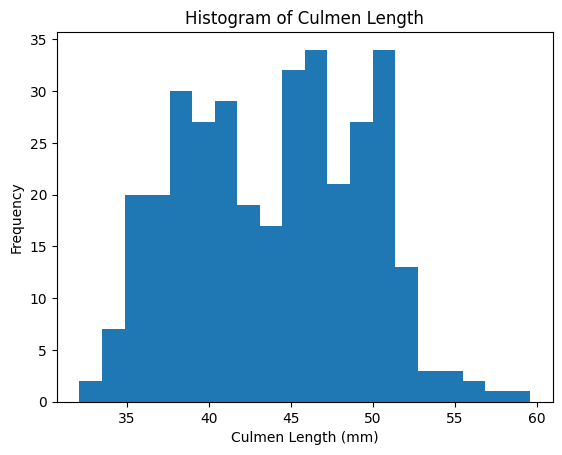

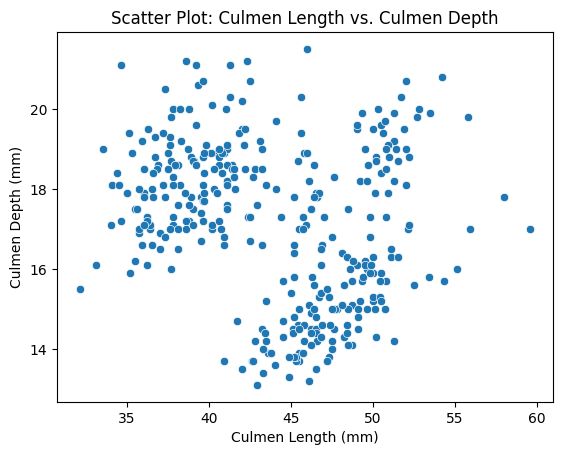

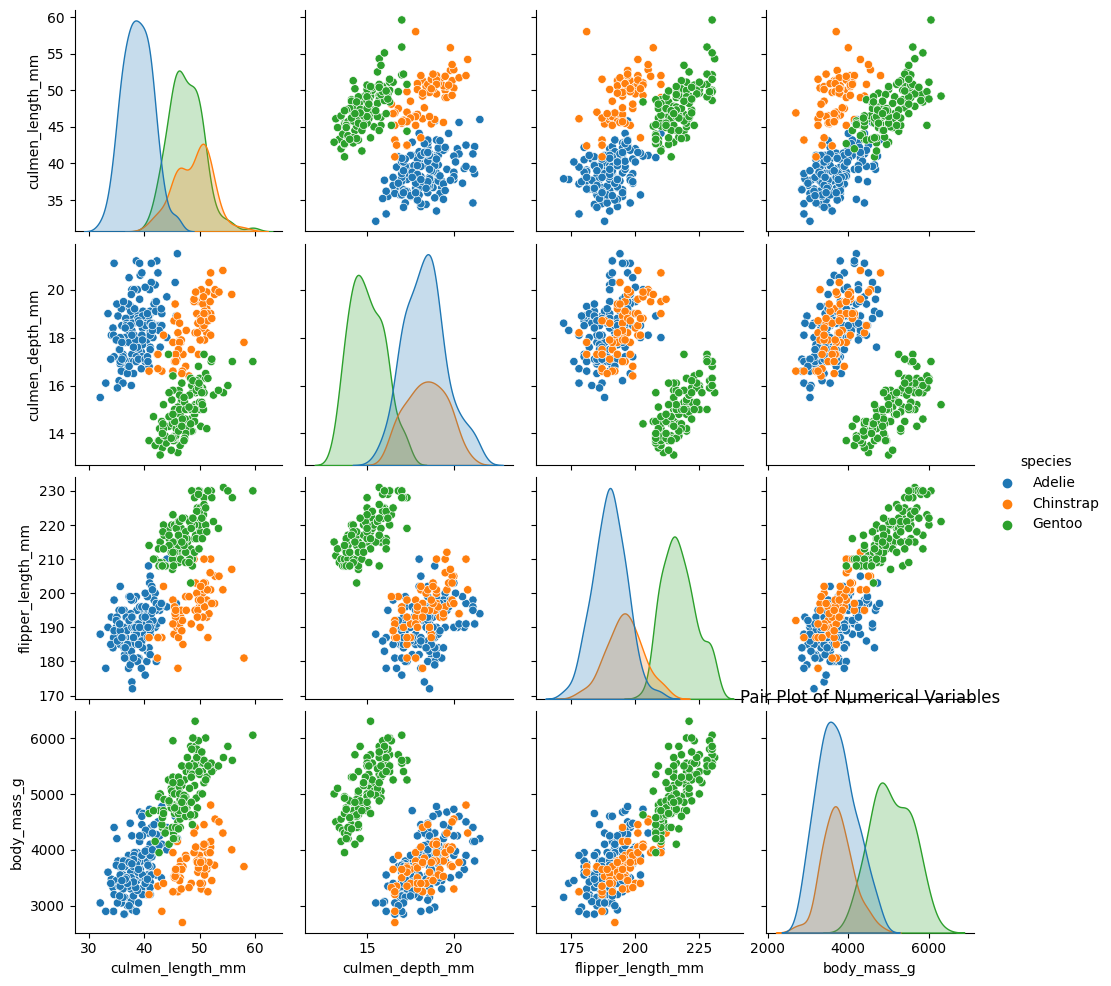

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis
# Example: Histogram of 'culmen_length_mm'
plt.hist(df['culmen_length_mm'], bins=20)
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Frequency')
plt.title('Histogram of Culmen Length')
plt.show()

# Bivariate Analysis
# Example: Scatter plot of 'culmen_length_mm' vs. 'culmen_depth_mm'
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', data=df)
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Scatter Plot: Culmen Length vs. Culmen Depth')
plt.show()

# Multi-Variate Analysis
# Example: Pair plot of numerical variables
sns.pairplot(df, hue='species')
plt.title('Pair Plot of Numerical Variables')
plt.show()


4)Descriptive Statistics:

In [5]:
# Descriptive statistics
descriptive_stats = df.describe()
print(descriptive_stats)


       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000


5)Check for Missing Values:

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


6)Find and Handle Outliers:

In [18]:
from scipy import stats

# Calculate Z-scores for numerical columns (e.g., 'culmen_length_mm')
z_scores = stats.zscore(df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']])

# Define a threshold for Z-scores (e.g., 3)
threshold = 3

# Find and remove outliers
df_no_outliers = df[(z_scores < threshold).all(axis=1)]

# You can also choose to keep the outliers and visualize them if needed
outliers = df[(z_scores >= threshold).any(axis=1)]

# Check the shape of the resulting DataFrame without outliers
print("Shape after removing outliers:", df_no_outliers.shape)


Shape after removing outliers: (0, 7)


7)Check Correlation with the Target:

In [ ]:
# Calculate correlations with numeric_only set to True
correlations = df.corr(numeric_only=True)

# Check the correlation of independent variables with the target
target_correlation = correlations['penguin_species'].sort_values(ascending=False)
print(target_correlation)


8)Categorical Encoding:

In [15]:
# Perform one-hot encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=['island', 'sex'], drop_first=True)


9)Split Data into Dependent and Independent Variables:

In [16]:
# Define X (independent variables) and y (dependent variable)
X = df_encoded.drop(columns=['species'])
y = df_encoded['species']


10)Scaling the Data:

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame if needed
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


11)Split Data into Training and Testing Sets:

In [20]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


12) Check the Training and Testing Data Shape:

In [21]:
# Check the shapes of training and testing data
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (275, 8) (275,)
Testing data shape: (69, 8) (69,)
